In [419]:
#cell 1
#Confirms main.py prints s1/s5 lines
MAIN = "/content/content/synth/main.py" #change only if path is different

with open(MAIN, "r", errors="ignore") as f:
    txt = f.read()
assert "s1:" in txt and "s5:" in txt, "Please apply the s1/s5 patch to main.py first."
print("Yes: main.py has s1/s5 in its progress print.")

Yes: main.py has s1/s5 in its progress print.


In [420]:
#cell 2
#paths
MAIN   = "/content/content/synth/main.py" #keep consistent
LOGDIR = "/content/run_logs_full" #full-run logs here

import os, pathlib, shlex, subprocess
pathlib.Path(LOGDIR).mkdir(parents=True, exist_ok=True)

def run_and_log(tag, **kw):
    """
    Runs main.py with given kwargs and writes stdout to LOGDIR/{tag}.log
    """
    cmd = ["python", MAIN]
    for k, v in kw.items():
        cmd += [f"--{k}", str(v)]
    print("RUN:", " ".join(shlex.quote(c) for c in cmd))
    out = subprocess.run(cmd, text=True, capture_output=True)
    print(out.stdout)
    open(f"{LOGDIR}/{tag}.log", "w").write(out.stdout)
    if out.stderr.strip():
        print("STDERR:\n", out.stderr)

In [421]:
#cell 3
#Learning rates
LR_GD   = "1e-3"
LR_ADAM = "1e-3"

#Iterations
LONG_ITERS_GD   = 800_000
LONG_ITERS_ADAM = 30_000

#Logging
LOG_EVERY_ADAM = 1000
LOG_EVERY_GD   = 20000 #800k / 20k = 40 points

#Shared synthetic configuration
BASE_SYN = dict(
    method="DLNN",
    data="gaussian", #noiseless synthetic (matrix completion)
    N=100,
    rank=5,
    reg_norm="ratio",
    initscale="1e-3",
    sample_size=2000,
    seed=67
)

In [422]:
'''#cell 4A - depth with penalty
#ADAM Fixed ONLY
#Depths {1,2,3,4,5} with fixed λ = 1e-4
for depth in (1, 2, 3, 4, 5):
    run_and_log(f"SYN_adam_d{depth}_lam1e-4_fixed",
        **BASE_SYN, depth=depth, lam="1e-4",
        optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM, log_interval=LOG_EVERY_ADAM)

# Fig.3: Adam, depth=1, λ in {0, 1e-2}
for lam in ("0.0", "1e-2"):
    run_and_log(f"F3_adam_d1_lam{lam}",
        **BASE_SYN, depth=1, lam=lam,
        optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM, log_interval=LOG_EVERY_ADAM)
'''

'#cell 4A - depth with penalty\n#ADAM Fixed ONLY\n#Depths {1,2,3,4,5} with fixed λ = 1e-4\nfor depth in (1, 2, 3, 4, 5):\n    run_and_log(f"SYN_adam_d{depth}_lam1e-4_fixed",\n        **BASE_SYN, depth=depth, lam="1e-4",\n        optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM, log_interval=LOG_EVERY_ADAM)\n\n# Fig.3: Adam, depth=1, λ in {0, 1e-2}\nfor lam in ("0.0", "1e-2"):\n    run_and_log(f"F3_adam_d1_lam{lam}",\n        **BASE_SYN, depth=1, lam=lam,\n        optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM, log_interval=LOG_EVERY_ADAM)\n'

In [423]:
'''#cell 4B - depth with penalty
#ADAM (cosine only)
for depth in (1, 2, 3, 4, 5):
    run_and_log(f"SYN_adam_d{depth}_lam1e-4_cos",
        **BASE_SYN, depth=depth, lam="1e-4", lam_schedule="cosine",
        optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM, log_interval=LOG_EVERY_ADAM)
    '''

'#cell 4B - depth with penalty\n#ADAM (cosine only)\nfor depth in (1, 2, 3, 4, 5):\n    run_and_log(f"SYN_adam_d{depth}_lam1e-4_cos",\n        **BASE_SYN, depth=depth, lam="1e-4", lam_schedule="cosine",\n        optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM, log_interval=LOG_EVERY_ADAM)\n    '

In [424]:
'''#cell 4C - depth with penalty
#GD Fixed ONLY
# Depths {1,2,3,4,5} with fixed λ = 1e-4
for depth in (1, 2, 3, 4, 5):
    run_and_log(f"SYN_gd_d{depth}_lam1e-4_fixed",
        **BASE_SYN, depth=depth, lam="1e-4",
        optim="GD", lr=LR_GD, niters=LONG_ITERS_GD, log_interval=LOG_EVERY_GD)

# Fig.3: GD, depth=1, λ in {0, 1e-2}
for lam in ("0.0", "1e-2"):
    run_and_log(f"F3_gd_d1_lam{lam}",
        **BASE_SYN, depth=1, lam=lam,
        optim="GD", lr=LR_GD, niters=LONG_ITERS_GD, log_interval=LOG_EVERY_GD)
'''

'#cell 4C - depth with penalty\n#GD Fixed ONLY\n# Depths {1,2,3,4,5} with fixed λ = 1e-4\nfor depth in (1, 2, 3, 4, 5):\n    run_and_log(f"SYN_gd_d{depth}_lam1e-4_fixed",\n        **BASE_SYN, depth=depth, lam="1e-4",\n        optim="GD", lr=LR_GD, niters=LONG_ITERS_GD, log_interval=LOG_EVERY_GD)\n\n# Fig.3: GD, depth=1, λ in {0, 1e-2}\nfor lam in ("0.0", "1e-2"):\n    run_and_log(f"F3_gd_d1_lam{lam}",\n        **BASE_SYN, depth=1, lam=lam,\n        optim="GD", lr=LR_GD, niters=LONG_ITERS_GD, log_interval=LOG_EVERY_GD)\n'

In [425]:
'''#cell 4D - depth with penalty
#GD (cosine only)
for depth in (1, 2, 3, 4, 5):
    run_and_log(f"SYN_gd_d{depth}_lam1e-4_cos",
        **BASE_SYN, depth=depth, lam="1e-4", lam_schedule="cosine",
        optim="GD", lr=LR_GD, niters=LONG_ITERS_GD, log_interval=LOG_EVERY_GD)
'''

'#cell 4D - depth with penalty\n#GD (cosine only)\nfor depth in (1, 2, 3, 4, 5):\n    run_and_log(f"SYN_gd_d{depth}_lam1e-4_cos",\n        **BASE_SYN, depth=depth, lam="1e-4", lam_schedule="cosine",\n        optim="GD", lr=LR_GD, niters=LONG_ITERS_GD, log_interval=LOG_EVERY_GD)\n'

In [426]:
#cell 5
#Fetch ML-100k (safe no-op if present)
import os, urllib.request, zipfile, io, pathlib
ML_DIR = "/content/ml-100k"
if not os.path.exists(f"{ML_DIR}/u.data"):
    print("Downloading MovieLens 100k …")
    data = urllib.request.urlopen("https://files.grouplens.org/datasets/movielens/ml-100k.zip").read()
    zipfile.ZipFile(io.BytesIO(data)).extractall("/content")
    assert os.path.exists(f"{ML_DIR}/u.data"), "MovieLens 100k not found after download."
print("✔ MovieLens ready.")

BASE_ML = dict(
    method="DLNN",
    data="ml-100k-sample",
    depth=1,
    optim="Adam",
    lr="5e-4", #working LR
    trainprop="0.8",
    reg_norm="ratio",
    initscale="1e-3",
    log_interval=1000,
    seed=67
)

#λ = 0 vs 1e-3
'''run_and_log("ML_lam0_adam_long",    **BASE_ML, lam="0.0",  niters=40_000)
run_and_log("ML_lam1e-3_adam_long", **BASE_ML, lam="1e-3", niters=40_000)'''

✔ MovieLens ready.


'run_and_log("ML_lam0_adam_long",    **BASE_ML, lam="0.0",  niters=40_000)\nrun_and_log("ML_lam1e-3_adam_long", **BASE_ML, lam="1e-3", niters=40_000)'

In [427]:
'''#cell 6
# Only if want to test λ schedule on ML-100k as well.
ML_CFG = dict(**BASE_ML)

run_and_log("ML_lam1e-3_adam_fixed", **ML_CFG, lam="1e-3", niters=40_000)
run_and_log("ML_lam1e-3_adam_cos",   **ML_CFG, lam="1e-3", lam_schedule="cosine", niters=40_000)
'''

'#cell 6\n# Only if want to test λ schedule on ML-100k as well.\nML_CFG = dict(**BASE_ML)\n\nrun_and_log("ML_lam1e-3_adam_fixed", **ML_CFG, lam="1e-3", niters=40_000)\nrun_and_log("ML_lam1e-3_adam_cos",   **ML_CFG, lam="1e-3", lam_schedule="cosine", niters=40_000)\n'

In [428]:
#Cell 8 - Scan logs (captures test_MSE too)
import os, re, glob, pandas as pd, numpy as np

LOG_GLOBS = [os.path.join(LOGDIR, "*.log")]
files = sorted({p for g in LOG_GLOBS for p in glob.glob(g)})

pat = re.compile(
    r"depth:\s*(\d+).*?iteration:\s*(\d+).*?"
    r"test_MSE:\s*([\-0-9\.Ee\+]+).*?test_RMSE:\s*([\-0-9\.Ee\+]+).*?"
    r"erank:\s*([\-0-9\.Ee\+]+).*?s1:\s*([\-0-9\.Ee\+]+).*?s5:\s*([\-0-9\.Ee\+]+)"
)

def infer_opt(name):
    n = name.lower()
    if "adam" in n: return "adam"
    if "gd"   in n: return "gd"
    return "unk"

rows = []
for path in files:
    with open(path, "r", errors="ignore") as f:
        for line in f:
            m = pat.search(line)
            if not m:
                continue
            d,it,mse,rmse,er,s1,s5 = m.groups()
            rows.append(dict(
                file=os.path.basename(path),
                fullpath=path,
                optimizer=infer_opt(path),
                depth=int(d),
                iteration=int(it),
                test_MSE=float(mse),
                test_RMSE=float(rmse),
                erank=float(er),
                s1=float(s1),
                s5=float(s5),
            ))

df = pd.DataFrame(rows).sort_values(["file","iteration"]).reset_index(drop=True)
print(f"Parsed {len(df)} rows from {len(files)} log files.")
if df.empty:
    raise RuntimeError("No rows parsed - ensure runs completed and logs contain test_MSE/test_RMSE/s1/s5.")
df.tail(10)


Parsed 1560 rows from 52 log files.


,file,fullpath,optimizer,depth,iteration,test_MSE,test_RMSE,erank,s1,s5
1550,SYN_adam_d5_lam1e-5_fixed.log,/content/run_logs_full/SYN_adam_d5_lam1e-5_fix...,adam,5,20000,0.000006,0.002485,4.994865,53.613316,36.521557
1551,SYN_adam_d5_lam1e-5_fixed.log,/content/run_logs_full/SYN_adam_d5_lam1e-5_fix...,adam,5,21000,0.000005,0.002209,4.994558,53.540325,36.473129
1552,SYN_adam_d5_lam1e-5_fixed.log,/content/run_logs_full/SYN_adam_d5_lam1e-5_fix...,adam,5,22000,0.000023,0.004817,4.993978,53.666161,36.511715
1553,SYN_adam_d5_lam1e-5_fixed.log,/content/run_logs_full/SYN_adam_d5_lam1e-5_fix...,adam,5,23000,0.000005,0.002209,4.994033,53.529888,36.495281
1554,SYN_adam_d5_lam1e-5_fixed.log,/content/run_logs_full/SYN_adam_d5_lam1e-5_fix...,adam,5,24000,0.000007,0.002635,4.992514,53.667484,36.487675
1555,SYN_adam_d5_lam1e-5_fixed.log,/content/run_logs_full/SYN_adam_d5_lam1e-5_fix...,adam,5,25000,0.000011,0.003329,4.993086,53.573483,36.447289
1556,SYN_adam_d5_lam1e-5_fixed.log,/content/run_logs_full/SYN_adam_d5_lam1e-5_fix...,adam,5,26000,0.000003,0.001775,4.993053,53.519611,36.496414
1557,SYN_adam_d5_lam1e-5_fixed.log,/content/run_logs_full/SYN_adam_d5_lam1e-5_fix...,adam,5,27000,0.000015,0.003917,4.991759,53.688782,36.443039
1558,SYN_adam_d5_lam1e-5_fixed.log,/content/run_logs_full/SYN_adam_d5_lam1e-5_fix...,adam,5,28000,0.000009,0.003010,4.992086,53.570618,36.480885
1559,SYN_adam_d5_lam1e-5_fixed.log,/content/run_logs_full/SYN_adam_d5_lam1e-5_fix...,adam,5,29000,0.000009,0.002985,4.991635,53.646431,36.478031


In [429]:
# Cell 9 - Fig.3 (depth=1): λ ∈ {0, 1e-2}; per-optimizer plots for MSE, erank, s1, s5
import re
import numpy as np
import matplotlib.pyplot as plt

pat = r"^F3_(adam|gd)_d1_lam([0-9eE\.\-\+]+)(?:\.log)?$"

sub = (
    df[(df["depth"] == 1) & (df["file"].str.match(pat, na=False))]
      .copy()
      .sort_values(["file","iteration"])
)

if sub.empty:
    print("[Fig.3] No rows found for depth=1 F3_* runs. "
          "Expected files like F3_adam_d1_lam0.0.log and F3_gd_d1_lam1e-2.log")
else:
    #Extract optimizer and lambda from filename
    parsed = sub["file"].str.extract(pat)
    sub["opt2"]    = parsed[0].str.lower() #adam or gd
    sub["lam_str"] = parsed[1]

    def lam_label(s: str) -> str:
        s = s.strip()
        return "0" if s in ("0", "0.0", "0.00") else s.replace("e-0", "e-")  # tidy label
    sub["lam_lbl"] = sub["lam_str"].map(lam_label)

    def _finite_xy(g, ycol):
        g = g.sort_values("iteration")
        x = g["iteration"].to_numpy()
        y = g[ycol].to_numpy()
        mask = np.isfinite(y)
        return x[mask], y[mask]

    def plot_one_optimizer(opt_name: str):
        gopt = sub[sub["opt2"] == opt_name].copy()
        if gopt.empty:
            print(f"[Fig.3] No rows for optimizer: {opt_name.upper()}")
            return

        #Test MSE (log-y) ---
        plt.figure(figsize=(7.0, 4.4))
        for lam, g in gopt.groupby("lam_lbl"):
            x, y = _finite_xy(g, "test_MSE")
            y = np.maximum(y, 1e-12)
            plt.semilogy(x, y, label=f"λ={lam}")
        plt.title(f"Fig.3 - Depth=1, Test MSE ({opt_name.upper()})")
        plt.xlabel("iteration"); plt.ylabel("test_MSE (log scale)")
        plt.legend(); plt.tight_layout(); plt.show()

        #Effective rank
        plt.figure(figsize=(7.0, 4.4))
        for lam, g in gopt.groupby("lam_lbl"):
            x, y = _finite_xy(g, "erank")
            plt.plot(x, y, label=f"λ={lam}")
        plt.title(f"Fig.3 - Depth=1, Effective Rank ({opt_name.upper()})")
        plt.xlabel("iteration"); plt.ylabel("effective rank")
        plt.legend(); plt.tight_layout(); plt.show()

        #s1 (top singular value) ---
        plt.figure(figsize=(7.0, 4.4))
        for lam, g in gopt.groupby("lam_lbl"):
            x, y = _finite_xy(g, "s1")
            plt.plot(x, y, label=f"λ={lam}")
        plt.title(f"Fig.3 - Depth=1, s1 ({opt_name.upper()})")
        plt.xlabel("iteration"); plt.ylabel("s1")
        plt.legend(); plt.tight_layout(); plt.show()

        #s5 (5th singular value) ---
        plt.figure(figsize=(7.0, 4.4))
        for lam, g in gopt.groupby("lam_lbl"):
            x, y = _finite_xy(g, "s5")
            if len(x) == 0:
                continue  #all NaNs (e.g., early iterations)
            plt.plot(x, y, label=f"λ={lam}")
        plt.title(f"Fig.3 - Depth=1, s5 ({opt_name.upper()})")
        plt.xlabel("iteration"); plt.ylabel("s5")
        plt.legend(); plt.tight_layout(); plt.show()

    #Make the eight plots: Adam (4) then GD (4)
    plot_one_optimizer("adam")
    plot_one_optimizer("gd")


[Fig.3] No rows found for depth=1 F3_* runs. Expected files like F3_adam_d1_lam0.0.log and F3_gd_d1_lam1e-2.log


[gd/fixed] No rows for λ=1e-1.
[gd/cos] No rows for λ=1e-1.


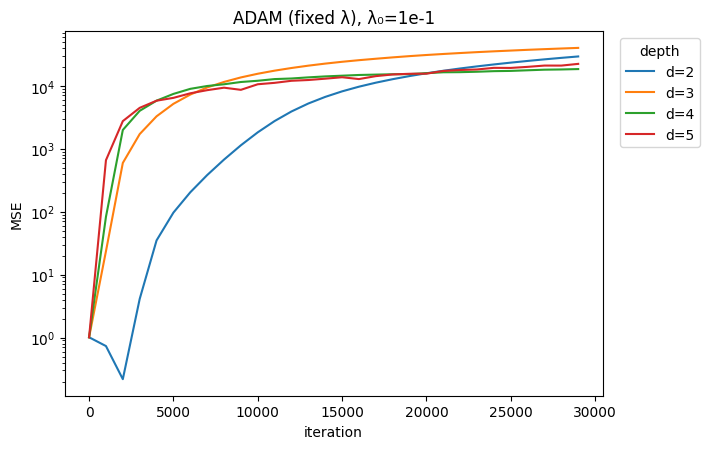

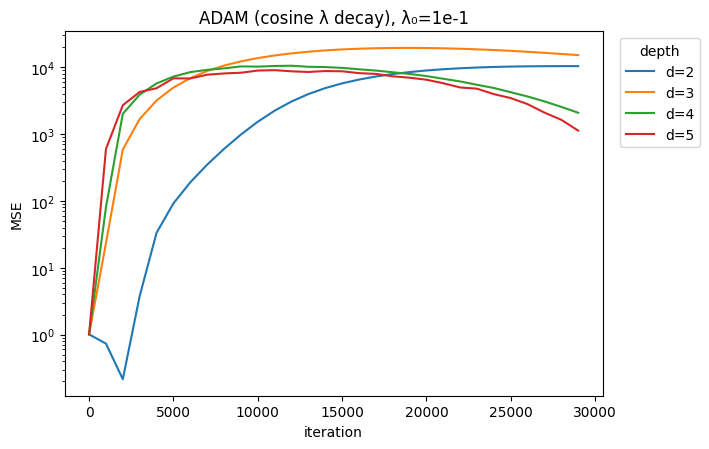

[gd/fixed] No rows for λ=1e-1.
[gd/cos] No rows for λ=1e-1.


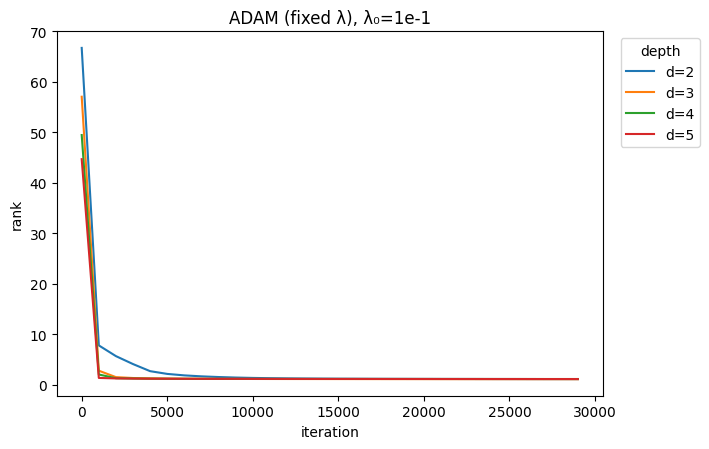

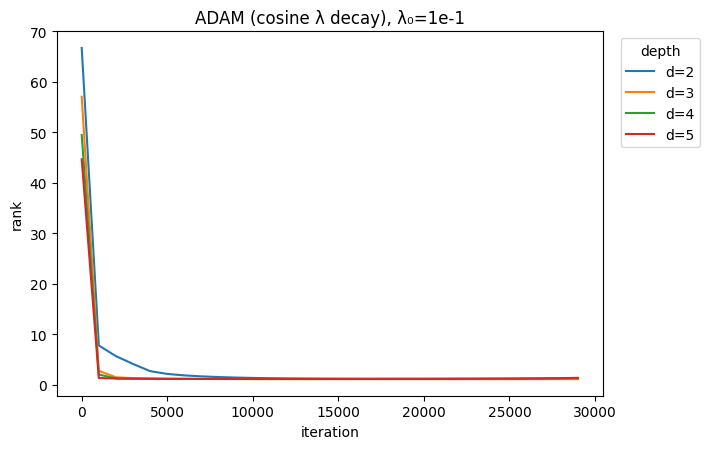

[gd/fixed] No rows for λ=1e-1.
[gd/cos] No rows for λ=1e-1.


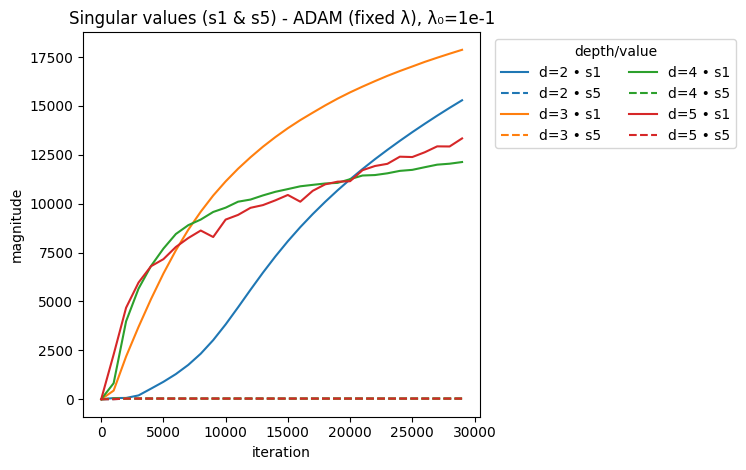

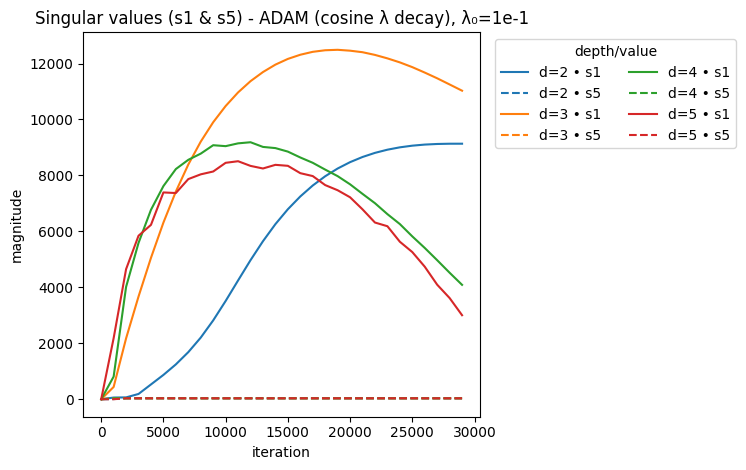

In [430]:
#Cell 10.1 - depths={2,3,4,5}: MSE (log-y), Effective Rank (linear), and Singular Values (s1 & s5). 1e-1
import matplotlib.pyplot as plt
import numpy as np

def _sched_tag_ok(fname: str, tag: str) -> bool:
    f = (fname or "").lower()
    if tag == "fixed":
        return "fixed" in f
    if tag == "cos":
        return "cos" in f
    return False

def _depth_colors(depths):
    return {d: f"C{i}" for i, d in enumerate(sorted(set(depths)))}

def _finite_xy(g, col):
    x = g["iteration"].to_numpy()
    y = g[col].to_numpy()
    m = np.isfinite(x) & np.isfinite(y)
    return x[m], y[m]

def _subset(df, opt_name, sched_tag, depths):
    mask = (
        (df["optimizer"].str.lower() == opt_name.lower()) &
        (df["depth"].isin(depths)) &
        (df["file"].str.contains("lam1e-1", na=False))
    )
    sub = df[mask].copy()
    if sub.empty:
        return sub
    # row-wise filter for schedule tag
    sub = sub[sub["file"].map(lambda fn: _sched_tag_ok(fn, sched_tag))]
    return sub

def plot_mse_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One semilog-y Test MSE chart for opt ('gd'/'adam') & schedule ('fixed'/'cos')."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-1.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.2, 4.6))
    seen = set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue
        label = f"d={d}" if d not in seen else None
        seen.add(d)
        y = np.maximum(g["test_MSE"].to_numpy(), 1e-12)
        plt.semilogy(g["iteration"], y, color=colors.get(d, "C0"), label=label)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"{opt_label} ({sched_full}), λ₀=1e-1")
    plt.xlabel("iteration"); plt.ylabel("MSE")
    plt.legend(title="depth", loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

def plot_erank_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One linear Effective Rank chart for opt ('gd'/'adam') & schedule ('fixed'/'cos')."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-1.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.2, 4.6))
    seen = set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue
        label = f"d={d}" if d not in seen else None
        seen.add(d)
        x, y = _finite_xy(g, "erank")
        plt.plot(x, y, color=colors.get(d, "C0"), label=label)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"{opt_label} ({sched_full}), λ₀=1e-1")
    plt.xlabel("iteration"); plt.ylabel("rank")
    plt.legend(title="depth", loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

def plot_sv_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One chart per (optimizer, schedule) showing s1 (solid) and s5 (dashed) for depths 2–5."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-1.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.6, 4.8))
    seen_s1, seen_s5 = set(), set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue

        #s1 (solid)
        x1, y1 = _finite_xy(g, "s1")
        if len(x1):
            label1 = f"d={d} • s1" if d not in seen_s1 else None
            seen_s1.add(d)
            plt.plot(x1, y1, color=colors.get(d, "C0"), linestyle="-", label=label1)

        #s5 (dashed)
        x5, y5 = _finite_xy(g, "s5")
        if len(x5):
            label5 = f"d={d} • s5" if d not in seen_s5 else None
            seen_s5.add(d)
            plt.plot(x5, y5, color=colors.get(d, "C0"), linestyle="--", label=label5)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"Singular values (s1 & s5) - {opt_label} ({sched_full}), λ₀=1e-1")
    plt.xlabel("iteration"); plt.ylabel("magnitude")
    plt.legend(ncol=2, loc="upper left", bbox_to_anchor=(1.02, 1.0), title="depth/value")
    plt.tight_layout(); plt.show()

#Four MSE charts
plot_mse_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_mse_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_mse_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_mse_for(df, "adam", "cos",   depths=(2,3,4,5))

#Four Effective Rank charts
plot_erank_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_erank_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_erank_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_erank_for(df, "adam", "cos",   depths=(2,3,4,5))

#Four Singular Value charts (s1 & s5 together)
plot_sv_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_sv_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_sv_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_sv_for(df, "adam", "cos",   depths=(2,3,4,5))


[gd/fixed] No rows for λ=1e-2.
[gd/cos] No rows for λ=1e-2.


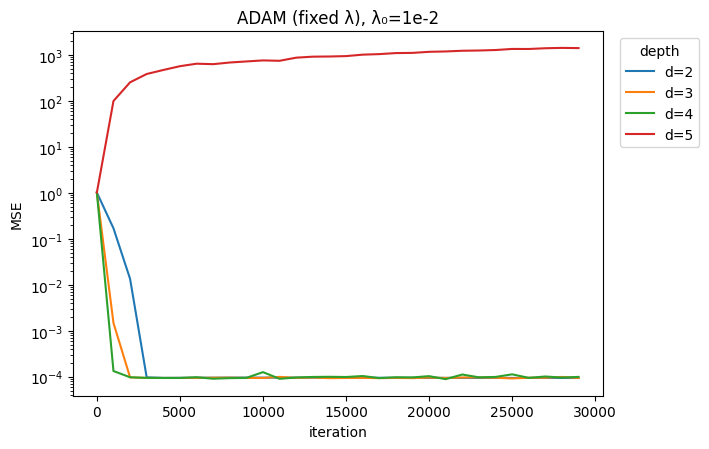

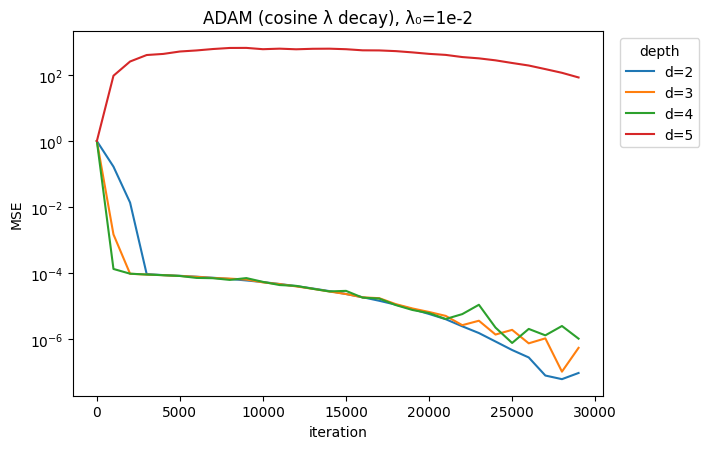

[gd/fixed] No rows for λ=1e-2.
[gd/cos] No rows for λ=1e-2.


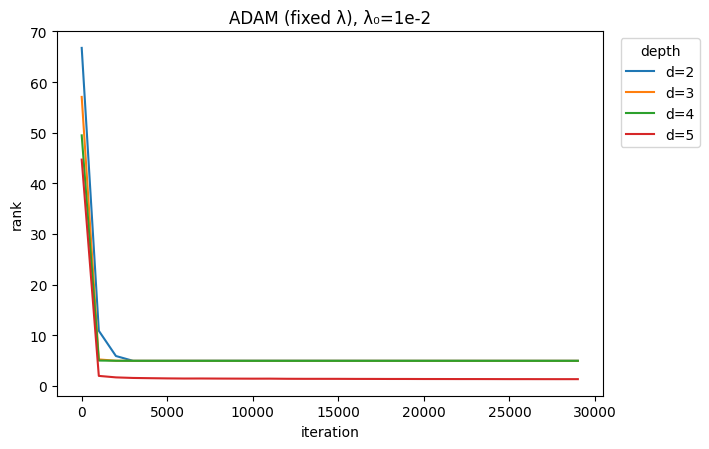

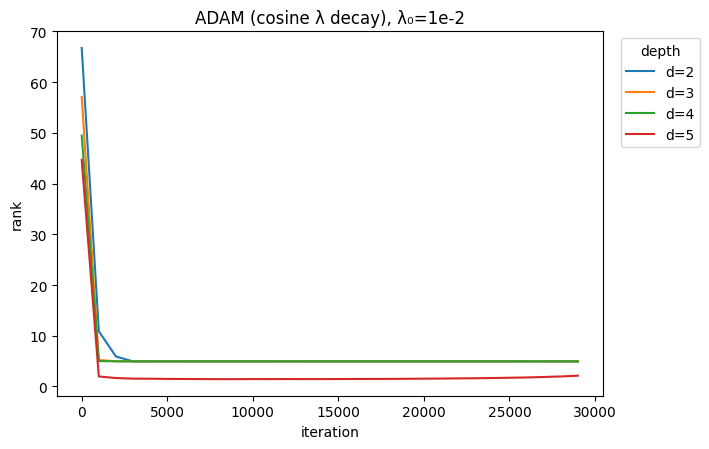

[gd/fixed] No rows for λ=1e-2.
[gd/cos] No rows for λ=1e-2.


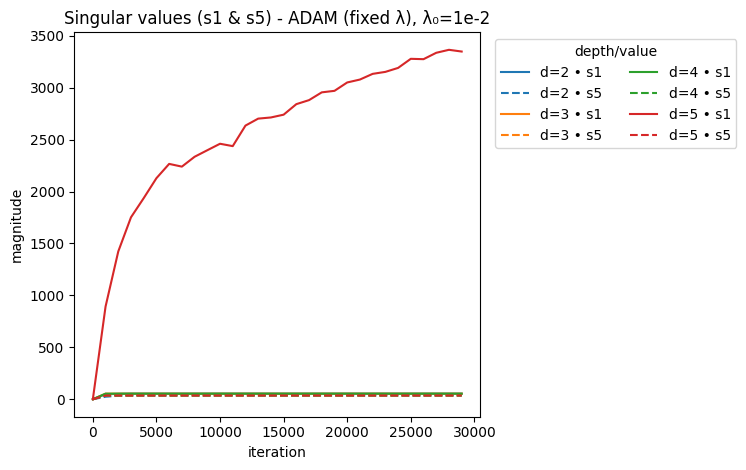

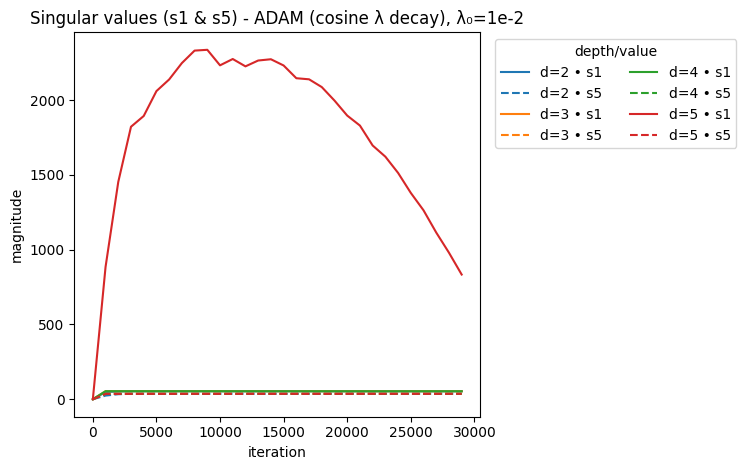

In [431]:
#Cell 10.2 - depths={2,3,4,5}: MSE (log-y), Effective Rank (linear), and Singular Values (s1 & s5). 1e-2
import matplotlib.pyplot as plt
import numpy as np

def _sched_tag_ok(fname: str, tag: str) -> bool:
    f = (fname or "").lower()
    if tag == "fixed":
        return "fixed" in f
    if tag == "cos":
        return "cos" in f
    return False

def _depth_colors(depths):
    return {d: f"C{i}" for i, d in enumerate(sorted(set(depths)))}

def _finite_xy(g, col):
    x = g["iteration"].to_numpy()
    y = g[col].to_numpy()
    m = np.isfinite(x) & np.isfinite(y)
    return x[m], y[m]

def _subset(df, opt_name, sched_tag, depths):
    mask = (
        (df["optimizer"].str.lower() == opt_name.lower()) &
        (df["depth"].isin(depths)) &
        (df["file"].str.contains("lam1e-2", na=False))
    )
    sub = df[mask].copy()
    if sub.empty:
        return sub
    #row-wise filter for schedule tag
    sub = sub[sub["file"].map(lambda fn: _sched_tag_ok(fn, sched_tag))]
    return sub

def plot_mse_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One semilog-y Test MSE chart for opt ('gd'/'adam') & schedule ('fixed'/'cos')."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-2.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.2, 4.6))
    seen = set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue
        label = f"d={d}" if d not in seen else None
        seen.add(d)
        y = np.maximum(g["test_MSE"].to_numpy(), 1e-12)
        plt.semilogy(g["iteration"], y, color=colors.get(d, "C0"), label=label)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"{opt_label} ({sched_full}), λ₀=1e-2")
    plt.xlabel("iteration"); plt.ylabel("MSE")
    plt.legend(title="depth", loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

def plot_erank_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One linear Effective Rank chart for opt ('gd'/'adam') & schedule ('fixed'/'cos')."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-2.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.2, 4.6))
    seen = set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue
        label = f"d={d}" if d not in seen else None
        seen.add(d)
        x, y = _finite_xy(g, "erank")
        plt.plot(x, y, color=colors.get(d, "C0"), label=label)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"{opt_label} ({sched_full}), λ₀=1e-2")
    plt.xlabel("iteration"); plt.ylabel("rank")
    plt.legend(title="depth", loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

def plot_sv_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One chart per (optimizer, schedule) showing s1 (solid) and s5 (dashed) for depths 2–5."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-2.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.6, 4.8))
    seen_s1, seen_s5 = set(), set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue

        #s1 (solid)
        x1, y1 = _finite_xy(g, "s1")
        if len(x1):
            label1 = f"d={d} • s1" if d not in seen_s1 else None
            seen_s1.add(d)
            plt.plot(x1, y1, color=colors.get(d, "C0"), linestyle="-", label=label1)

        #s5 (dashed)
        x5, y5 = _finite_xy(g, "s5")
        if len(x5):
            label5 = f"d={d} • s5" if d not in seen_s5 else None
            seen_s5.add(d)
            plt.plot(x5, y5, color=colors.get(d, "C0"), linestyle="--", label=label5)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"Singular values (s1 & s5) - {opt_label} ({sched_full}), λ₀=1e-2")
    plt.xlabel("iteration"); plt.ylabel("magnitude")
    plt.legend(ncol=2, loc="upper left", bbox_to_anchor=(1.02, 1.0), title="depth/value")
    plt.tight_layout(); plt.show()

#Four MSE charts
plot_mse_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_mse_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_mse_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_mse_for(df, "adam", "cos",   depths=(2,3,4,5))

#Four Effective Rank charts
plot_erank_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_erank_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_erank_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_erank_for(df, "adam", "cos",   depths=(2,3,4,5))

#Four Singular Value charts (s1 & s5 together)
plot_sv_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_sv_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_sv_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_sv_for(df, "adam", "cos",   depths=(2,3,4,5))


[gd/fixed] No rows for λ=1e-3.
[gd/cos] No rows for λ=1e-3.


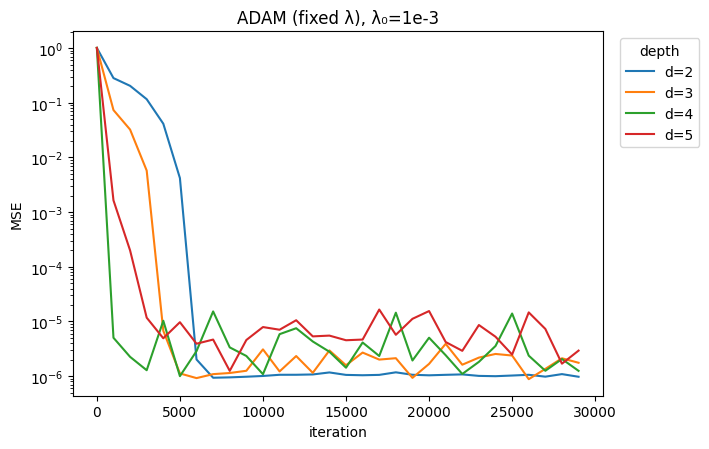

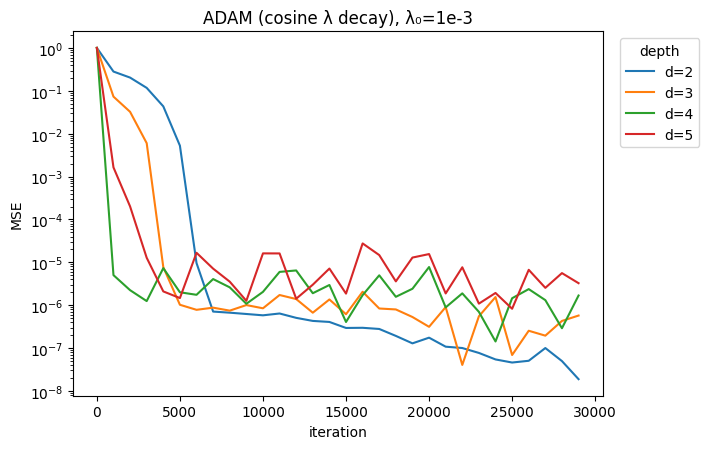

[gd/fixed] No rows for λ=1e-3.
[gd/cos] No rows for λ=1e-3.


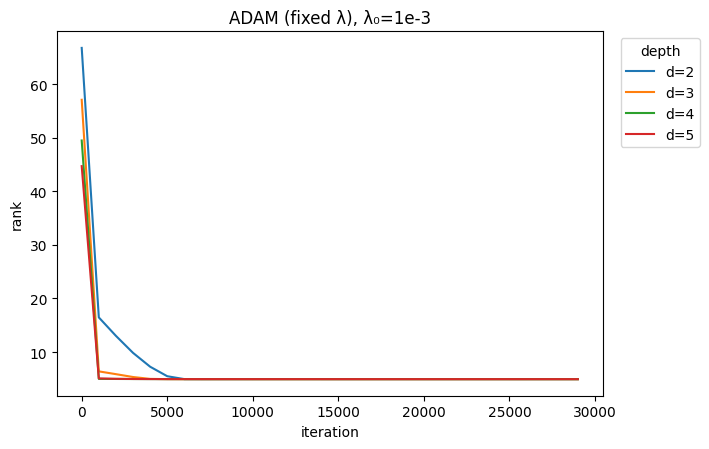

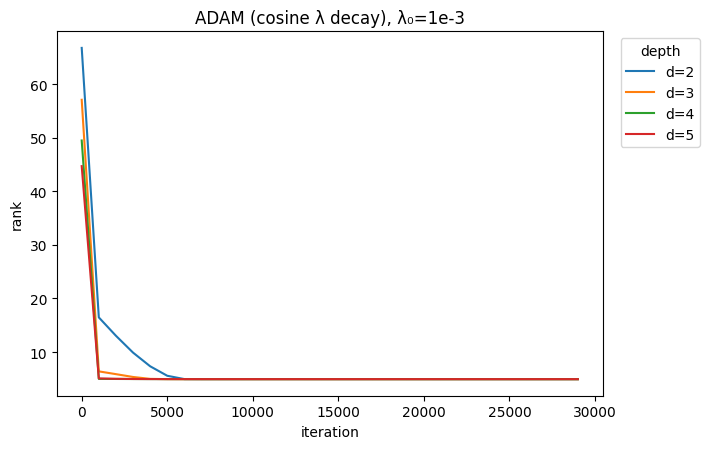

[gd/fixed] No rows for λ=1e-3.
[gd/cos] No rows for λ=1e-3.


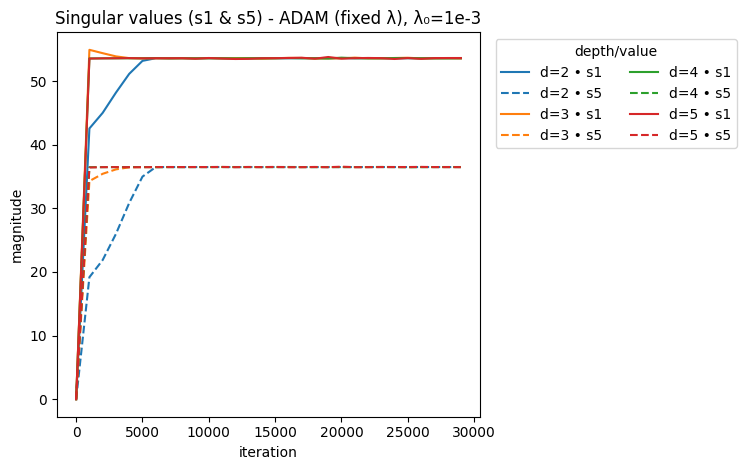

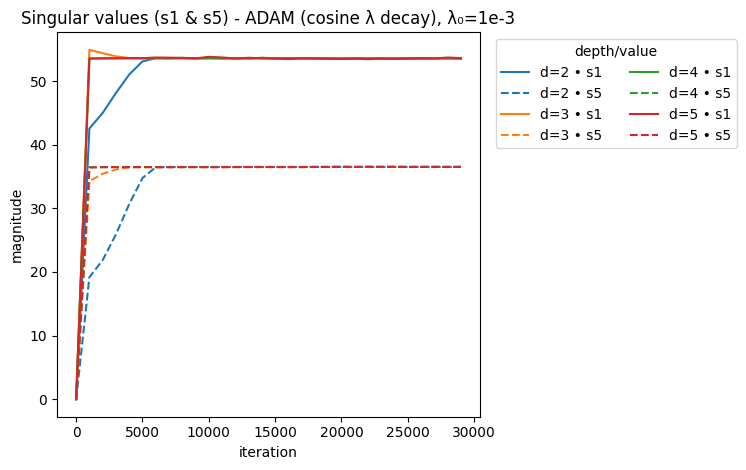

In [432]:
#Cell 10.3 - depths={2,3,4,5}: MSE (log-y), Effective Rank (linear), and Singular Values (s1 & s5). 1e-3
import matplotlib.pyplot as plt
import numpy as np

def _sched_tag_ok(fname: str, tag: str) -> bool:
    f = (fname or "").lower()
    if tag == "fixed":
        return "fixed" in f
    if tag == "cos":
        return "cos" in f
    return False

def _depth_colors(depths):
    return {d: f"C{i}" for i, d in enumerate(sorted(set(depths)))}

def _finite_xy(g, col):
    x = g["iteration"].to_numpy()
    y = g[col].to_numpy()
    m = np.isfinite(x) & np.isfinite(y)
    return x[m], y[m]

def _subset(df, opt_name, sched_tag, depths):
    mask = (
        (df["optimizer"].str.lower() == opt_name.lower()) &
        (df["depth"].isin(depths)) &
        (df["file"].str.contains("lam1e-3", na=False))
    )
    sub = df[mask].copy()
    if sub.empty:
        return sub
    #row-wise filter for schedule tag
    sub = sub[sub["file"].map(lambda fn: _sched_tag_ok(fn, sched_tag))]
    return sub

def plot_mse_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One semilog-y Test MSE chart for opt ('gd'/'adam') & schedule ('fixed'/'cos')."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-3.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.2, 4.6))
    seen = set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue
        label = f"d={d}" if d not in seen else None
        seen.add(d)
        y = np.maximum(g["test_MSE"].to_numpy(), 1e-12)
        plt.semilogy(g["iteration"], y, color=colors.get(d, "C0"), label=label)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"{opt_label} ({sched_full}), λ₀=1e-3")
    plt.xlabel("iteration"); plt.ylabel("MSE")
    plt.legend(title="depth", loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

def plot_erank_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One linear Effective Rank chart for opt ('gd'/'adam') & schedule ('fixed'/'cos')."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-3.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.2, 4.6))
    seen = set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue
        label = f"d={d}" if d not in seen else None
        seen.add(d)
        x, y = _finite_xy(g, "erank")
        plt.plot(x, y, color=colors.get(d, "C0"), label=label)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"{opt_label} ({sched_full}), λ₀=1e-3")
    plt.xlabel("iteration"); plt.ylabel("rank")
    plt.legend(title="depth", loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

def plot_sv_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One chart per (optimizer, schedule) showing s1 (solid) and s5 (dashed) for depths 2–5."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-3.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.6, 4.8))
    seen_s1, seen_s5 = set(), set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue

        #s1 (solid)
        x1, y1 = _finite_xy(g, "s1")
        if len(x1):
            label1 = f"d={d} • s1" if d not in seen_s1 else None
            seen_s1.add(d)
            plt.plot(x1, y1, color=colors.get(d, "C0"), linestyle="-", label=label1)

        #s5 (dashed)
        x5, y5 = _finite_xy(g, "s5")
        if len(x5):
            label5 = f"d={d} • s5" if d not in seen_s5 else None
            seen_s5.add(d)
            plt.plot(x5, y5, color=colors.get(d, "C0"), linestyle="--", label=label5)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"Singular values (s1 & s5) - {opt_label} ({sched_full}), λ₀=1e-3")
    plt.xlabel("iteration"); plt.ylabel("magnitude")
    plt.legend(ncol=2, loc="upper left", bbox_to_anchor=(1.02, 1.0), title="depth/value")
    plt.tight_layout(); plt.show()

#Four MSE charts
plot_mse_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_mse_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_mse_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_mse_for(df, "adam", "cos",   depths=(2,3,4,5))

#Four Effective Rank charts
plot_erank_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_erank_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_erank_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_erank_for(df, "adam", "cos",   depths=(2,3,4,5))

#Four Singular Value charts (s1 & s5 together)
plot_sv_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_sv_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_sv_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_sv_for(df, "adam", "cos",   depths=(2,3,4,5))


[gd/fixed] No rows for λ=1e-4.
[gd/cos] No rows for λ=1e-4.


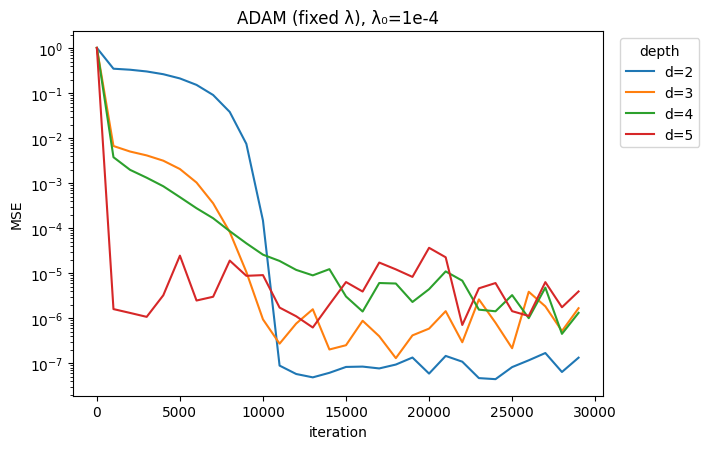

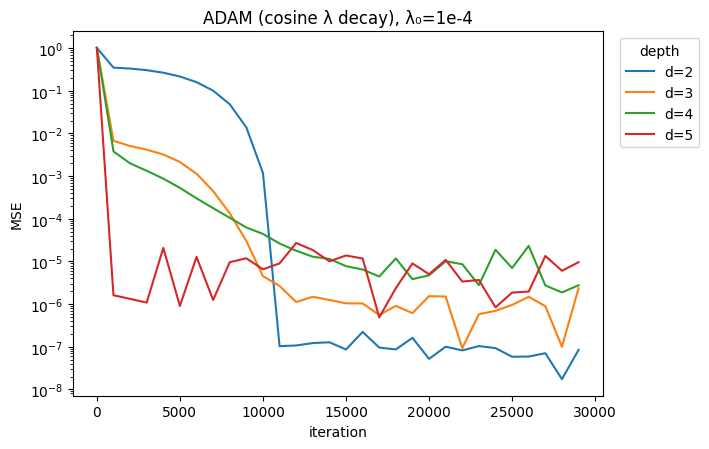

[gd/fixed] No rows for λ=1e-4.
[gd/cos] No rows for λ=1e-4.


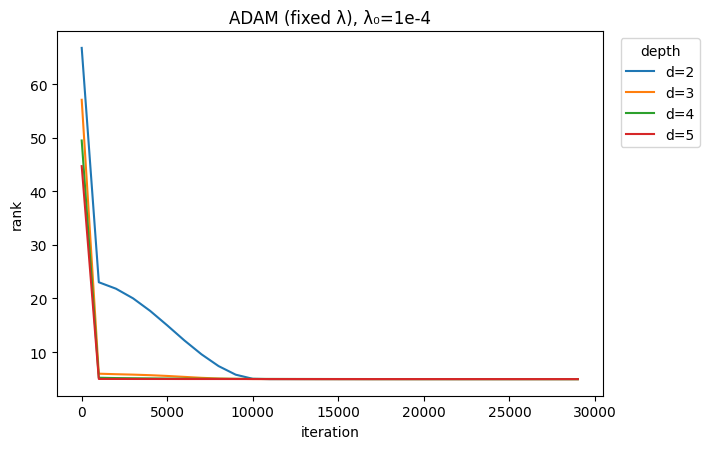

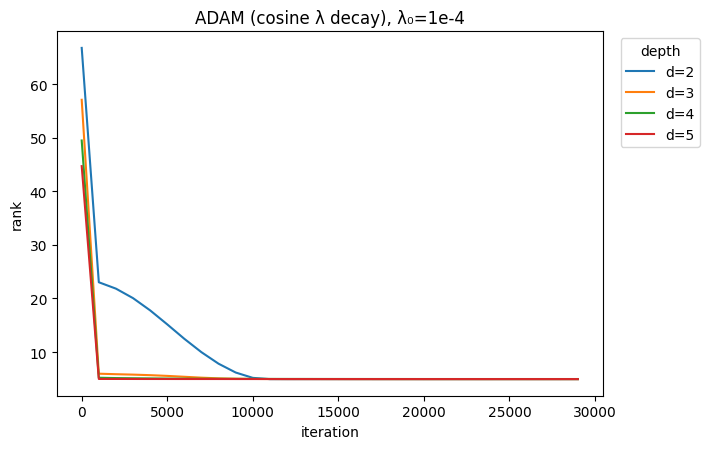

[gd/fixed] No rows for λ=1e-4.
[gd/cos] No rows for λ=1e-4.


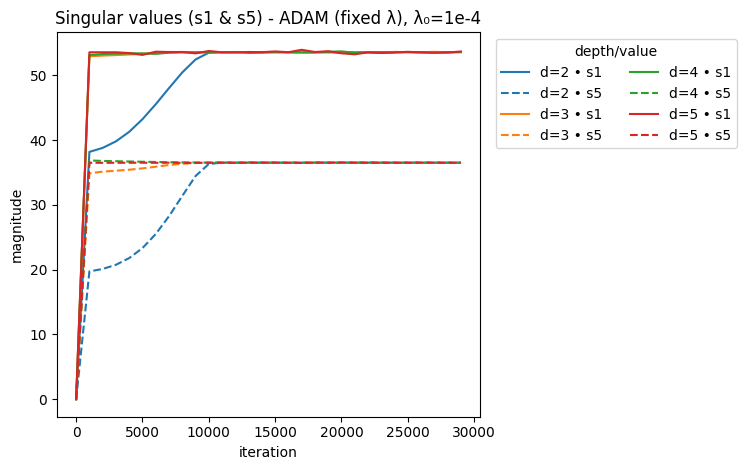

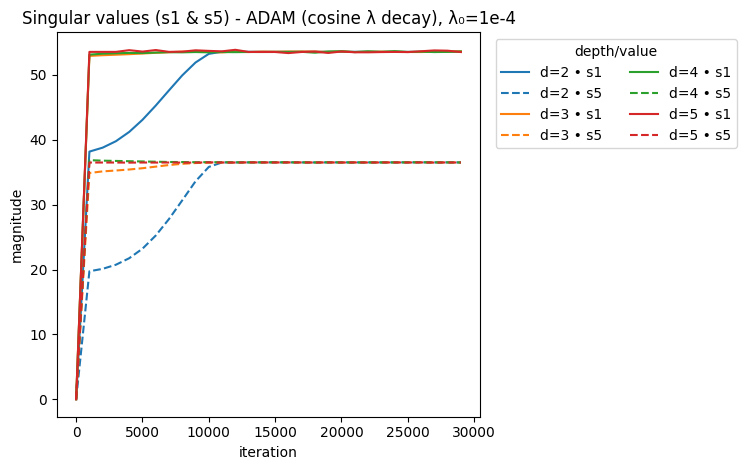

In [433]:
#Cell 10.4 - depths={2,3,4,5}: MSE (log-y), Effective Rank (linear), and Singular Values (s1 & s5). 1e-4
import matplotlib.pyplot as plt
import numpy as np

def _sched_tag_ok(fname: str, tag: str) -> bool:
    f = (fname or "").lower()
    if tag == "fixed":
        return "fixed" in f
    if tag == "cos":
        return "cos" in f
    return False

def _depth_colors(depths):
    return {d: f"C{i}" for i, d in enumerate(sorted(set(depths)))}

def _finite_xy(g, col):
    x = g["iteration"].to_numpy()
    y = g[col].to_numpy()
    m = np.isfinite(x) & np.isfinite(y)
    return x[m], y[m]

def _subset(df, opt_name, sched_tag, depths):
    mask = (
        (df["optimizer"].str.lower() == opt_name.lower()) &
        (df["depth"].isin(depths)) &
        (df["file"].str.contains("lam1e-4", na=False))
    )
    sub = df[mask].copy()
    if sub.empty:
        return sub
    #row-wise filter for schedule tag
    sub = sub[sub["file"].map(lambda fn: _sched_tag_ok(fn, sched_tag))]
    return sub

def plot_mse_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One semilog-y Test MSE chart for opt ('gd'/'adam') & schedule ('fixed'/'cos')."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-4.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.2, 4.6))
    seen = set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue
        label = f"d={d}" if d not in seen else None
        seen.add(d)
        y = np.maximum(g["test_MSE"].to_numpy(), 1e-12)
        plt.semilogy(g["iteration"], y, color=colors.get(d, "C0"), label=label)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"{opt_label} ({sched_full}), λ₀=1e-4")
    plt.xlabel("iteration"); plt.ylabel("MSE")
    plt.legend(title="depth", loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

def plot_erank_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One linear Effective Rank chart for opt ('gd'/'adam') & schedule ('fixed'/'cos')."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-4.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.2, 4.6))
    seen = set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue
        label = f"d={d}" if d not in seen else None
        seen.add(d)
        x, y = _finite_xy(g, "erank")
        plt.plot(x, y, color=colors.get(d, "C0"), label=label)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"{opt_label} ({sched_full}), λ₀=1e-4")
    plt.xlabel("iteration"); plt.ylabel("rank")
    plt.legend(title="depth", loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

def plot_sv_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One chart per (optimizer, schedule) showing s1 (solid) and s5 (dashed) for depths 2–5."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-4.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.6, 4.8))
    seen_s1, seen_s5 = set(), set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue

        #s1 (solid)
        x1, y1 = _finite_xy(g, "s1")
        if len(x1):
            label1 = f"d={d} • s1" if d not in seen_s1 else None
            seen_s1.add(d)
            plt.plot(x1, y1, color=colors.get(d, "C0"), linestyle="-", label=label1)

        #s5 (dashed)
        x5, y5 = _finite_xy(g, "s5")
        if len(x5):
            label5 = f"d={d} • s5" if d not in seen_s5 else None
            seen_s5.add(d)
            plt.plot(x5, y5, color=colors.get(d, "C0"), linestyle="--", label=label5)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"Singular values (s1 & s5) - {opt_label} ({sched_full}), λ₀=1e-4")
    plt.xlabel("iteration"); plt.ylabel("magnitude")
    plt.legend(ncol=2, loc="upper left", bbox_to_anchor=(1.02, 1.0), title="depth/value")
    plt.tight_layout(); plt.show()

#Four MSE charts
plot_mse_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_mse_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_mse_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_mse_for(df, "adam", "cos",   depths=(2,3,4,5))

#Four Effective Rank charts
plot_erank_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_erank_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_erank_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_erank_for(df, "adam", "cos",   depths=(2,3,4,5))

#Four Singular Value charts (s1 & s5 together)
plot_sv_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_sv_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_sv_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_sv_for(df, "adam", "cos",   depths=(2,3,4,5))


[gd/fixed] No rows for λ=1e-5.
[gd/cos] No rows for λ=1e-5.


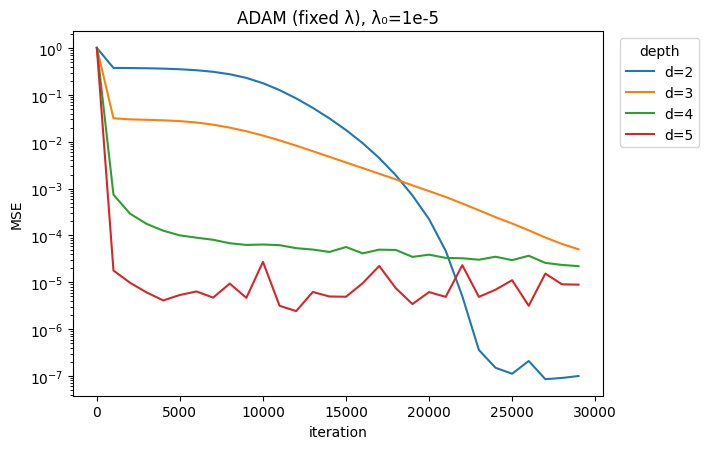

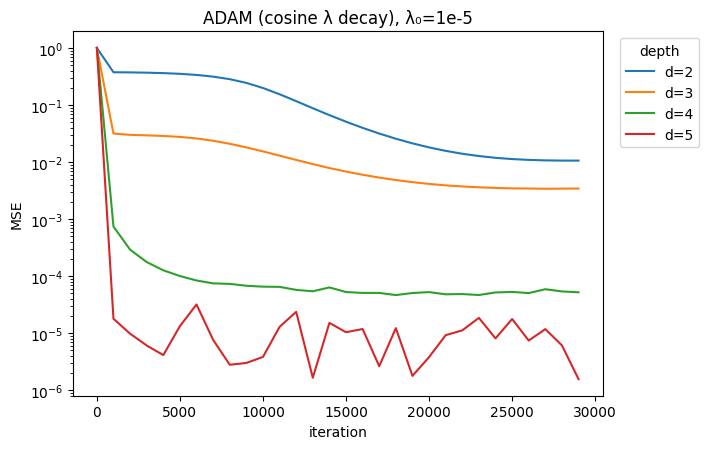

[gd/fixed] No rows for λ=1e-5.
[gd/cos] No rows for λ=1e-5.


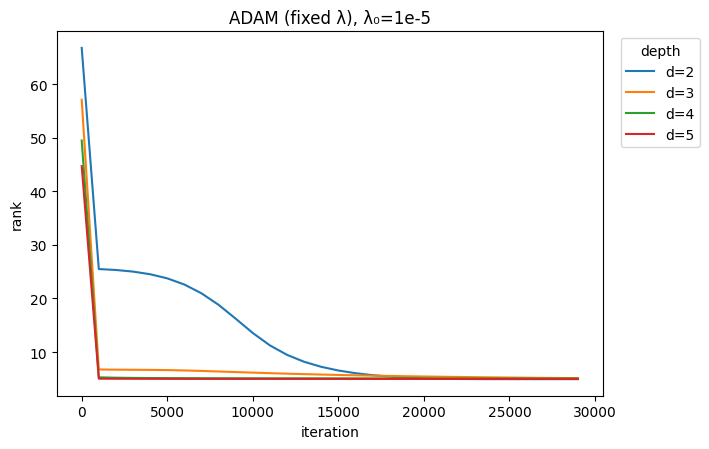

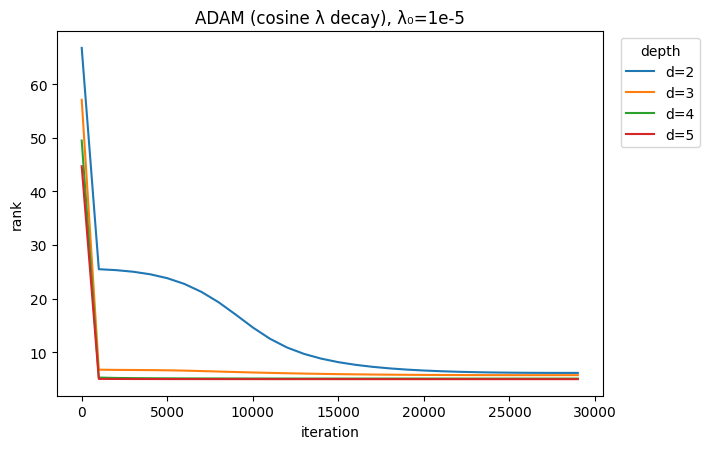

[gd/fixed] No rows for λ=1e-5.
[gd/cos] No rows for λ=1e-5.


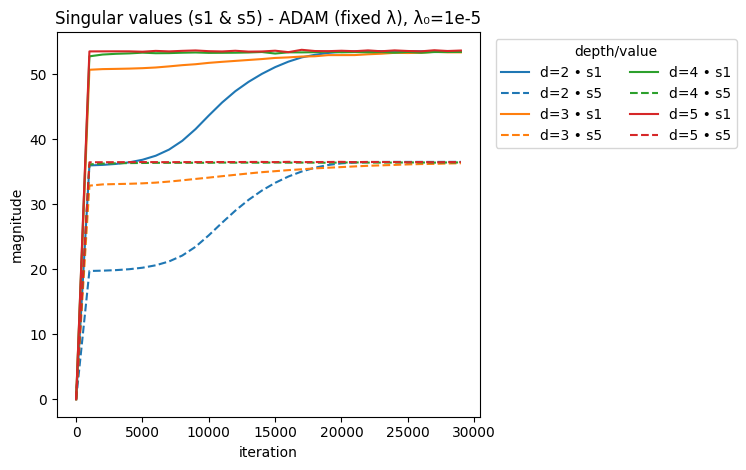

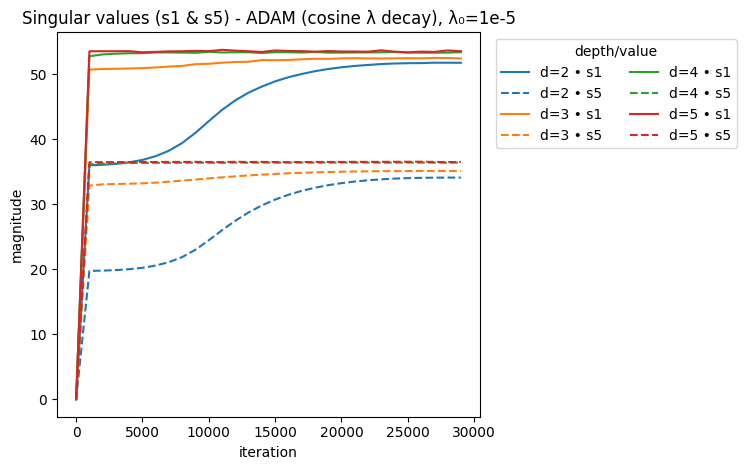

In [434]:
#Cell 10.5 - depths={2,3,4,5}: MSE (log-y), Effective Rank (linear), and Singular Values (s1 & s5). 1e-5
import matplotlib.pyplot as plt
import numpy as np

def _sched_tag_ok(fname: str, tag: str) -> bool:
    f = (fname or "").lower()
    if tag == "fixed":
        return "fixed" in f
    if tag == "cos":
        return "cos" in f
    return False

def _depth_colors(depths):
    return {d: f"C{i}" for i, d in enumerate(sorted(set(depths)))}

def _finite_xy(g, col):
    x = g["iteration"].to_numpy()
    y = g[col].to_numpy()
    m = np.isfinite(x) & np.isfinite(y)
    return x[m], y[m]

def _subset(df, opt_name, sched_tag, depths):
    mask = (
        (df["optimizer"].str.lower() == opt_name.lower()) &
        (df["depth"].isin(depths)) &
        (df["file"].str.contains("lam1e-5", na=False))
    )
    sub = df[mask].copy()
    if sub.empty:
        return sub
    #row-wise filter for schedule tag
    sub = sub[sub["file"].map(lambda fn: _sched_tag_ok(fn, sched_tag))]
    return sub

def plot_mse_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One semilog-y Test MSE chart for opt ('gd'/'adam') & schedule ('fixed'/'cos')."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-5.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.2, 4.6))
    seen = set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue
        label = f"d={d}" if d not in seen else None
        seen.add(d)
        y = np.maximum(g["test_MSE"].to_numpy(), 1e-12)
        plt.semilogy(g["iteration"], y, color=colors.get(d, "C0"), label=label)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"{opt_label} ({sched_full}), λ₀=1e-5")
    plt.xlabel("iteration"); plt.ylabel("MSE")
    plt.legend(title="depth", loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

def plot_erank_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One linear Effective Rank chart for opt ('gd'/'adam') & schedule ('fixed'/'cos')."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-5.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.2, 4.6))
    seen = set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue
        label = f"d={d}" if d not in seen else None
        seen.add(d)
        x, y = _finite_xy(g, "erank")
        plt.plot(x, y, color=colors.get(d, "C0"), label=label)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"{opt_label} ({sched_full}), λ₀=1e-5")
    plt.xlabel("iteration"); plt.ylabel("rank")
    plt.legend(title="depth", loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

def plot_sv_for(df, opt_name: str, sched_tag: str, depths=(2,3,4,5)):
    """One chart per (optimizer, schedule) showing s1 (solid) and s5 (dashed) for depths 2–5."""
    sub = _subset(df, opt_name, sched_tag, depths)
    if sub.empty:
        print(f"[{opt_name}/{sched_tag}] No rows for λ=1e-5.")
        return

    colors = _depth_colors(depths)
    plt.figure(figsize=(7.6, 4.8))
    seen_s1, seen_s5 = set(), set()
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        d = int(g["depth"].iloc[0])
        if d not in depths:
            continue

        #s1 (solid)
        x1, y1 = _finite_xy(g, "s1")
        if len(x1):
            label1 = f"d={d} • s1" if d not in seen_s1 else None
            seen_s1.add(d)
            plt.plot(x1, y1, color=colors.get(d, "C0"), linestyle="-", label=label1)

        #s5 (dashed)
        x5, y5 = _finite_xy(g, "s5")
        if len(x5):
            label5 = f"d={d} • s5" if d not in seen_s5 else None
            seen_s5.add(d)
            plt.plot(x5, y5, color=colors.get(d, "C0"), linestyle="--", label=label5)

    opt_label  = opt_name.upper()
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"Singular values (s1 & s5) - {opt_label} ({sched_full}), λ₀=1e-5")
    plt.xlabel("iteration"); plt.ylabel("magnitude")
    plt.legend(ncol=2, loc="upper left", bbox_to_anchor=(1.02, 1.0), title="depth/value")
    plt.tight_layout(); plt.show()

#Four MSE charts
plot_mse_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_mse_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_mse_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_mse_for(df, "adam", "cos",   depths=(2,3,4,5))

#Four Effective Rank charts
plot_erank_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_erank_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_erank_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_erank_for(df, "adam", "cos",   depths=(2,3,4,5))

#Four Singular Value charts (s1 & s5 together)
plot_sv_for(df, "gd",   "fixed", depths=(2,3,4,5))
plot_sv_for(df, "gd",   "cos",   depths=(2,3,4,5))
plot_sv_for(df, "adam", "fixed", depths=(2,3,4,5))
plot_sv_for(df, "adam", "cos",   depths=(2,3,4,5))


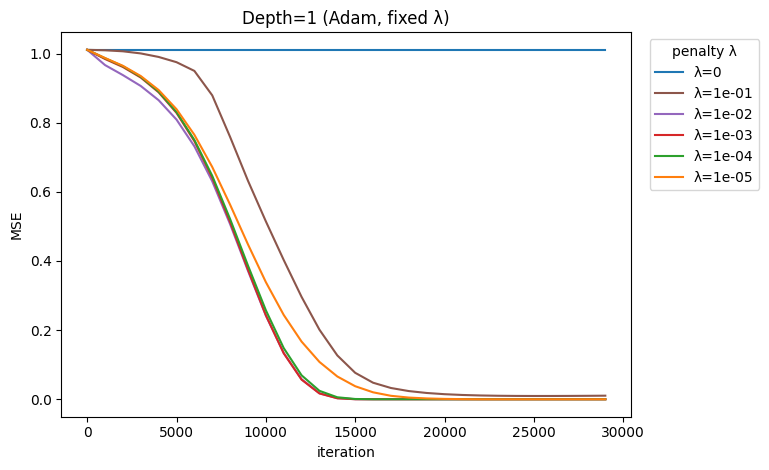

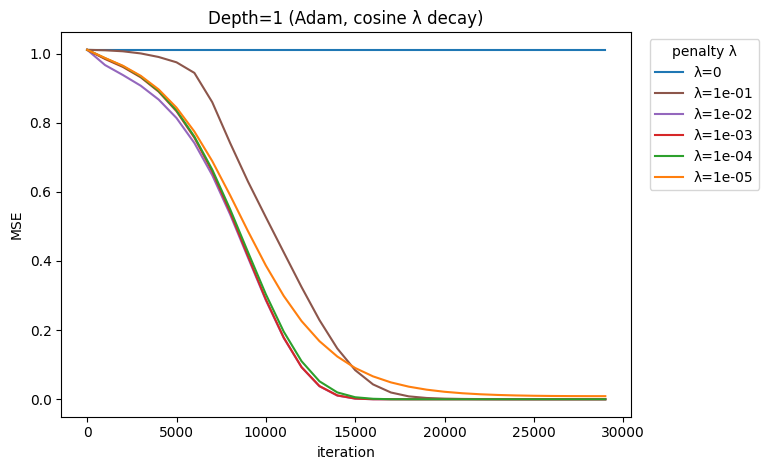

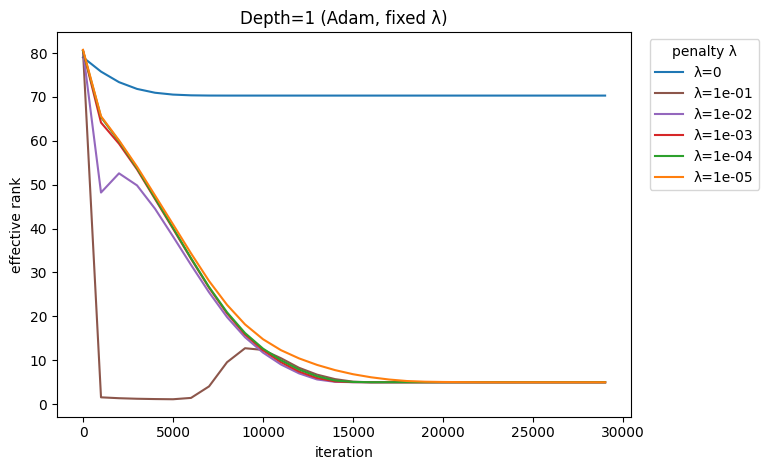

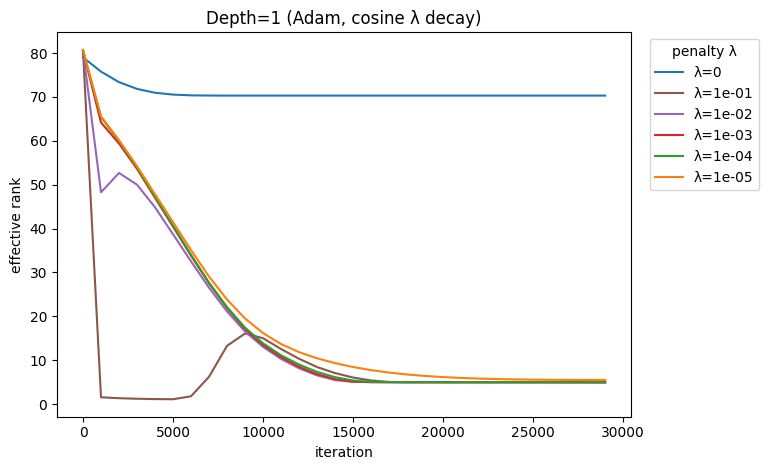

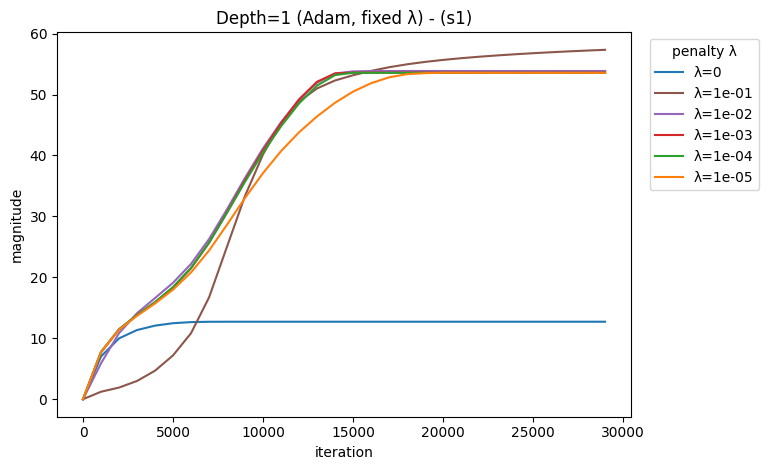

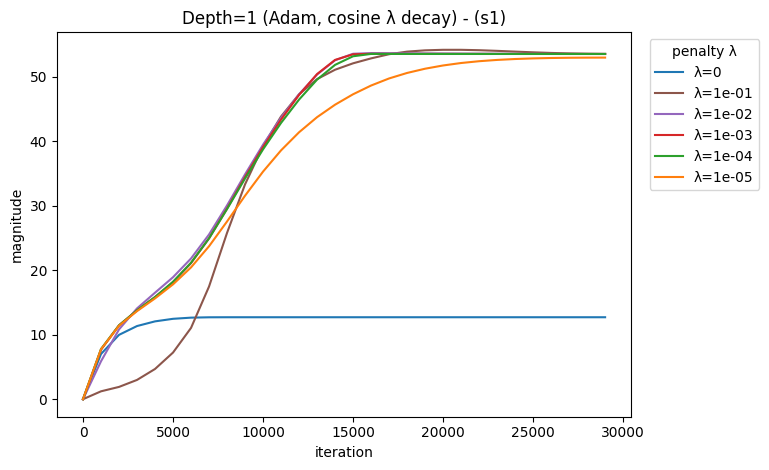

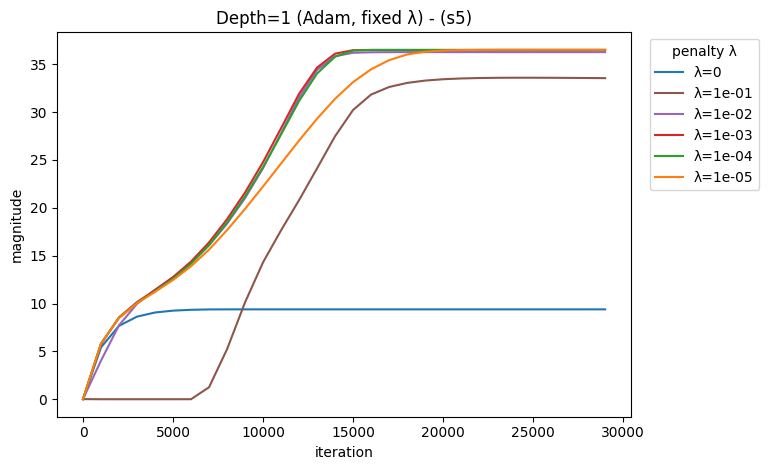

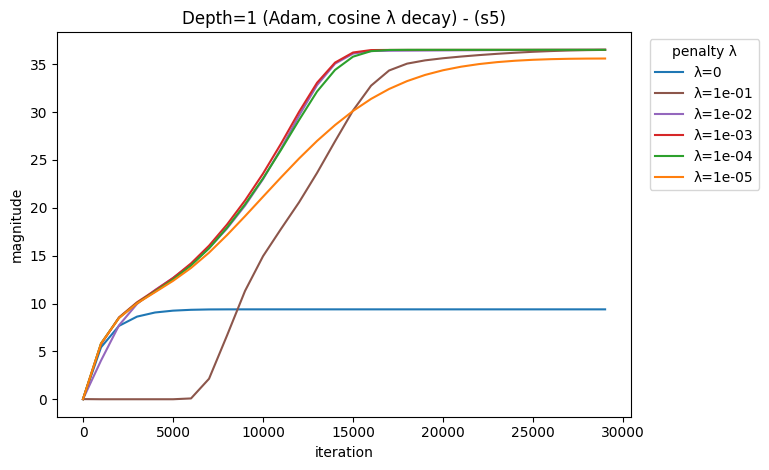

In [435]:
#Cell - Depth=1, Adam-only: strict filename convention + 8 charts total
#Filenames must look like: SYN_adam_d1_lam<val>_fixed.log or SYN_adam_d1_lam<val>_cos.log
#Charts per schedule (fixed, cos): MSE, effective rank, s1, s5 (all linear y)

import re
import numpy as np
import matplotlib.pyplot as plt

#configuration
TARGET_LAMS = [0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5] # exact set to display
FILE_RE = re.compile(r"^SYN_adam_d1_lam([0-9eE\.\-\+]+)_(fixed|cos)\.log$", re.IGNORECASE)

def _match_convention(fname: str):
    """Return (lam: float, sched: 'fixed'|'cos') if filename matches convention, else None."""
    m = FILE_RE.match(fname or "")
    if not m:
        return None
    lam_txt, sched = m.groups()
    try:
        lam = float(lam_txt)
    except Exception:
        return None
    return lam, sched.lower()

def _finite_xy(g, col):
    x = g["iteration"].to_numpy()
    y = g[col].to_numpy()
    m = np.isfinite(x) & np.isfinite(y)
    return x[m], y[m]

def _lam_label(lam: float) -> str:
    return "0" if lam == 0 else f"{lam:.0e}"

def _depth1_adam_df(df):
    """Keep only rows that:
       - belong to depth=1
       - come from filenames matching SYN_adam_d1_lam<val>_(fixed|cos).log
       - have optimizer 'adam' (inferred)
       - have λ in TARGET_LAMS
    """
    sub = df[(df["depth"] == 1) & (df["optimizer"].str.lower() == "adam")].copy()
    if sub.empty:
        return sub

    parsed = sub["file"].map(_match_convention)
    keep_mask = parsed.notna()
    sub = sub[keep_mask].copy()
    if sub.empty:
        return sub

    #unpack parsed (lam, sched)
    sub["lam"]   = [p[0] for p in parsed[keep_mask]]
    sub["sched"] = [p[1] for p in parsed[keep_mask]]

    #keep only the exact target lambdas
    sub = sub[sub["lam"].isin(TARGET_LAMS)]
    return sub

def _plot_depth1_adam_sweep(df, sched_tag: str, metric: str, title_suffix: str):
    """
    One chart for a given schedule tag ('fixed' or 'cos') and metric ('test_MSE','erank','s1','s5').
    Curves are depth=1 Adam, grouped by λ ∈ TARGET_LAMS, using strict filename convention.
    """
    sub = _depth1_adam_df(df)
    if sub.empty:
        print("[depth=1/adam] No rows matching the strict SYN_adam_d1_lam*_*.log convention.")
        return

    sub = sub[sub["sched"] == sched_tag]
    if sub.empty:
        print(f"[depth=1/adam/{sched_tag}] No rows for schedule={sched_tag}.")
        return

    #Sort λ for consistent color assignment
    unique_lams = sorted({float(x) for x in sub["lam"].unique() if np.isfinite(x)})
    if not unique_lams:
        print(f"[depth=1/adam/{sched_tag}] No valid λ values from filenames.")
        return
    colors = {lam: f"C{i % 10}" for i, lam in enumerate(unique_lams)}

    plt.figure(figsize=(7.8, 4.8))
    #Each file corresponds to one run/λ; plot its curve
    for file_name, g in sub.groupby("file"):
        g = g.sort_values("iteration")
        lam = float(g["lam"].iloc[0])
        if lam not in TARGET_LAMS:
            continue
        x, y = _finite_xy(g, metric)
        if len(x) == 0:
            continue
        plt.plot(x, y, color=colors.get(lam, "C0"), label=f"λ={_lam_label(lam)}")

    ylab = {"test_MSE": "MSE", "erank": "effective rank", "s1": "magnitude", "s5": "magnitude"}.get(metric, metric)
    sched_full = "fixed λ" if sched_tag == "fixed" else "cosine λ decay"
    plt.title(f"Depth=1 (Adam, {sched_full}){title_suffix}")
    plt.xlabel("iteration"); plt.ylabel(ylab)
    plt.legend(title="penalty λ", loc="upper left", bbox_to_anchor=(1.02, 1.0))
    plt.tight_layout()
    plt.show()

#Make the eight charts (fixed & cos × MSE/erank/s1/s5)
#MSE
(_plot_depth1_adam_sweep(df, "fixed", "test_MSE", "")) #fixed, MSE
(_plot_depth1_adam_sweep(df, "cos",   "test_MSE", "")) #cos, MSE

#Effective rank
(_plot_depth1_adam_sweep(df, "fixed", "erank", "")) #fixed, rank
(_plot_depth1_adam_sweep(df, "cos",   "erank", "")) #cos, rank

#Singular values (separate charts)
(_plot_depth1_adam_sweep(df, "fixed", "s1", " - (s1)")) #fixed, s1
(_plot_depth1_adam_sweep(df, "cos",   "s1",  " - (s1)")) #cos, s1
(_plot_depth1_adam_sweep(df, "fixed", "s5", " - (s5)")) #fixed, s5
(_plot_depth1_adam_sweep(df, "cos",   "s5",  " - (s5)")) #cos, s5


In [436]:
#Cell — Winners between fixed vs cosine per (optimizer, depth, λ)
#Requires df with columns:
#  file, iteration, optimizer, depth, test_MSE, test_RMSE, erank, s1, s5
#Filenames must match:
#  SYN_(adam|gd)_d{depth}_lam{lambda}_{fixed|cos}.log

import re
import numpy as np
import pandas as pd

#config
TARGET_R = 5.0 #ground-truth rank for synthetic
EPS      = 0.5 #tolerance for "time-to-rank" threshold
FILE_RE  = re.compile(r"^SYN_(adam|gd)_d(\d+)_lam([0-9eE\.\-\+]+)_(fixed|cos)\.log$", re.IGNORECASE)

def _parse_name(fname: str):
    """Return (opt, depth:int, lam:float, sched) or None if mismatch."""
    m = FILE_RE.match(fname or "")
    if not m:
        return None
    opt, d, lam_txt, sched = m.groups()
    try:
        lam = float(lam_txt)
    except Exception:
        return None
    return opt.lower(), int(d), lam, sched.lower()

def _fmt_lambda(lam: float) -> str:
    """Format λ as '0' or '1e-5' (compact sci, no leading zero in exponent)."""
    if lam == 0:
        return "0"
    s = f"{lam:.0e}" #e.g., '1e-05', '1e-01'
    s = s.replace("e-0", "e-").replace("e+0", "e+") #-> '1e-5', '1e-1'
    return s

def _time_to_rank(group, r_star=TARGET_R, eps=EPS):
    """Earliest iteration where erank <= r*+eps; None if never."""
    g = group.sort_values("iteration")
    hit = g[g["erank"] <= (r_star + eps)]
    return int(hit["iteration"].iloc[0]) if not hit.empty else None

def _last_row_per_file(df_in: pd.DataFrame) -> pd.DataFrame:
    """Take last-iteration row for each file."""
    idx = df_in.groupby("file")["iteration"].idxmax()
    return df_in.loc[idx].copy()

#1) Keep synthetic logs only (exclude MovieLens etc.)
base = df[~df["file"].str.contains("ML_", na=False)].copy()

#2) Strictly parse filenames and attach (optimizer, depth, lam, schedule)
parsed = base["file"].map(_parse_name)
mask = parsed.notna()
strict = base[mask].copy()
if strict.empty:
    raise RuntimeError("No matching SYN_* logs found. Check filename convention.")

strict["optimizer"] = [p[0] for p in parsed[mask]]
strict["depth"]     = [p[1] for p in parsed[mask]]
strict["lam"]       = [p[2] for p in parsed[mask]]
strict["schedule"]  = [p[3] for p in parsed[mask]]

#3) Compute time_to_rank PER FILE (needs full trajectory)
ttr = (strict.sort_values(["file","iteration"])
              .groupby("file")
              .apply(_time_to_rank)
              .rename("time_to_rank")
              .reset_index())

#4) Merge time_to_rank back into strict, then take last row per file for “last metrics”
strict = strict.merge(ttr, on="file", how="left")
last    = _last_row_per_file(strict)

#5) For each (optimizer, depth, lam) pick winner between fixed and cos for each metric
def _winner_pair(a_val, b_val, smaller_is_better=True):
    """Return 'fixed' if A wins, 'cos' if B wins, 'tie' if incomparable."""
    #Handle Nones/NaNs for time_to_rank
    if a_val is None and b_val is None:
        return "tie"
    if a_val is None:
        return "cos"
    if b_val is None:
        return "fixed"
    #Numeric compare
    if np.isnan(a_val) and np.isnan(b_val):
        return "tie"
    if np.isnan(a_val):
        return "cos"
    if np.isnan(b_val):
        return "fixed"
    if smaller_is_better:
        if a_val < b_val:  return "fixed"
        if b_val < a_val:  return "cos"
        return "tie"
    else:
        if a_val > b_val:  return "fixed"
        if b_val > a_val:  return "cos"
        return "tie"

rows = []
group_keys = ["optimizer", "depth", "lam"]
for (opt, d, lam), g in last.groupby(group_keys):
    #Expect up to two rows: fixed and cos
    a = g[g["schedule"] == "fixed"].iloc[0] if (g["schedule"] == "fixed").any() else None
    b = g[g["schedule"] == "cos"].iloc[0]   if (g["schedule"] == "cos").any() else None

    if a is None and b is None:
        continue

    #Pull values (None if missing side)
    vals = {}
    for side, row in (("fixed", a), ("cos", b)):
        vals[(side, "ttr")] = None if row is None else row["time_to_rank"]
        vals[(side, "mse")] = np.nan if row is None else float(row["test_MSE"])
        vals[(side, "rank")] = np.nan if row is None else float(row["erank"])
        vals[(side, "s1")] = np.nan if row is None else float(row["s1"])
        vals[(side, "s5")] = np.nan if row is None else float(row["s5"])

    #Winners (all smaller-is-better)
    win_ttr  = _winner_pair(vals[("fixed","ttr")],  vals[("cos","ttr")],  smaller_is_better=True)
    win_mse  = _winner_pair(vals[("fixed","mse")],  vals[("cos","mse")],  smaller_is_better=True)
    win_rank = _winner_pair(vals[("fixed","rank")], vals[("cos","rank")], smaller_is_better=True)
    win_s1   = _winner_pair(vals[("fixed","s1")],   vals[("cos","s1")],   smaller_is_better=True)
    win_s5   = _winner_pair(vals[("fixed","s5")],   vals[("cos","s5")],   smaller_is_better=True)

    rows.append(dict(
        optimizer = opt.upper(),
        depth     = d,
        lam       = lam,
        λ = _fmt_lambda(lam),
        time_to_rank = win_ttr,
        MSE          = win_mse,
        rank         = win_rank,
        s1           = win_s1,
        s5           = win_s5,
        #(optional) also show the actual last values for reference
        fixed_time_to_rank  = vals[("fixed","ttr")],
        cos_time_to_rank    = vals[("cos","ttr")],
        fixed_MSE           = vals[("fixed","mse")],
        cos_MSE             = vals[("cos","mse")],
        fixed_rank          = vals[("fixed","rank")],
        cos_rank            = vals[("cos","rank")],
        fixed_s1            = vals[("fixed","s1")],
        cos_s1              = vals[("cos","s1")],
        fixed_s5            = vals[("fixed","s5")],
        cos_s5              = vals[("cos","s5")],
    ))

winners = (pd.DataFrame(rows)
             .sort_values(["optimizer","depth","lam"])
             .reset_index(drop=True))

'''# Display — concise winner-only view (with pretty λ)
cols_winner = ["optimizer","depth","lambda_str",
               "winner_time_to_rank","winner_MSE","winner_rank","winner_s1","winner_s5"]
print("Winner (fixed vs cosine) by (optimizer, depth, λ)")
print(winners[cols_winner].to_string(index=False))'''

#If want the numeric values alongside:
print("WINNERS, With last values for reference")
print(winners.to_string(index=False))


WINNERS, With last values for reference
optimizer  depth     lam    λ time_to_rank   MSE  rank    s1    s5  fixed_time_to_rank  cos_time_to_rank    fixed_MSE      cos_MSE  fixed_rank  cos_rank     fixed_s1       cos_s1  fixed_s5    cos_s5
     ADAM      1 0.00000    0          tie   tie   tie   tie   tie                 NaN               NaN 1.010915e+00 1.010915e+00   70.319214 70.319214    12.729551    12.729551  9.393572  9.393572
     ADAM      1 0.00001 1e-5        fixed fixed fixed   cos   cos             18000.0           27000.0 1.176790e-08 8.916817e-03    4.962967  5.477940    53.559200    52.998081 36.511059 35.602459
     ADAM      1 0.00010 1e-4        fixed   cos   cos   cos fixed             14000.0           15000.0 6.897417e-08 2.057628e-10    4.973366  4.951391    53.564007    53.557182 36.507801 36.513184
     ADAM      1 0.00100 1e-3        fixed   cos   cos   cos fixed             14000.0           15000.0 1.251637e-06 4.392891e-10    4.978434  4.952266    53.59118

/tmp/ipython-input-3849064507.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(_time_to_rank)


In [437]:
'''#cell 12
ml = df[df["file"].str.contains("ML_", na=False)]
assert not ml.empty, "No MovieLens rows parsed. Run Cell 6 first."

#Extract λ from filename for labeling
def lab(name):
    return "λ=1e-3" if "lam1e-3" in name else "λ=0"

def plot_ml(metric, title):
    plt.figure(figsize=(6.6,4.4))
    for key, g in ml.groupby("file"):
        g = g.sort_values("iteration")
        plt.plot(g["iteration"], g[metric], "--", label=f"Adam d=1, {lab(key)}")
    plt.xlabel("iteration"); plt.ylabel(metric); plt.title(title)
    plt.legend(); plt.tight_layout(); plt.show()

plot_ml("test_RMSE", "MovieLens: test_RMSE")
plot_ml("erank",     "MovieLens: erank")

#summary table
last = (ml.sort_values(["file","iteration"])
          .groupby("file").tail(1)
          [["file","iteration","test_RMSE","erank","s1","s5"]])
print("=== MovieLens last metrics ===")
print(last.to_string(index=False))'''

'#cell 12\nml = df[df["file"].str.contains("ML_", na=False)]\nassert not ml.empty, "No MovieLens rows parsed. Run Cell 6 first."\n\n#Extract λ from filename for labeling\ndef lab(name):\n    return "λ=1e-3" if "lam1e-3" in name else "λ=0"\n\ndef plot_ml(metric, title):\n    plt.figure(figsize=(6.6,4.4))\n    for key, g in ml.groupby("file"):\n        g = g.sort_values("iteration")\n        plt.plot(g["iteration"], g[metric], "--", label=f"Adam d=1, {lab(key)}")\n    plt.xlabel("iteration"); plt.ylabel(metric); plt.title(title)\n    plt.legend(); plt.tight_layout(); plt.show()\n\nplot_ml("test_RMSE", "MovieLens: test_RMSE")\nplot_ml("erank",     "MovieLens: erank")\n\n#summary table\nlast = (ml.sort_values(["file","iteration"])\n          .groupby("file").tail(1)\n          [["file","iteration","test_RMSE","erank","s1","s5"]])\nprint("=== MovieLens last metrics ===")\nprint(last.to_string(index=False))'

In [438]:
#Cell — Last metrics per run (strict SYN_* filename convention)
#Expects a DataFrame `df` with columns:
#  file, iteration, optimizer, depth, test_MSE, test_RMSE, erank, s1, s5
#Filenames must look like:
#  SYN_{adam|gd}_d{depth}_lam{lambda}_{fixed|cos}.log

import re
import numpy as np
import pandas as pd

FILE_RE = re.compile(
    r"^SYN_(adam|gd)_d(\d+)_lam([0-9eE\.\-\+]+)_(fixed|cos)\.log$",
    re.IGNORECASE
)

def _parse_name(fname: str):
    """Return (optimizer, depth:int, lam:float, schedule) or None if mismatch."""
    m = FILE_RE.match(fname or "")
    if not m:
        return None
    opt, d, lam_txt, sched = m.groups()
    try:
        lam = float(lam_txt)
    except Exception:
        return None
    return opt.lower(), int(d), lam, sched.lower()

#1) Keep only synthetic logs (exclude MovieLens etc.)
base = df[~df["file"].str.contains("ML_", na=False)].copy()

#2) Parse filenames; drop rows that don't match the strict convention
parsed = base["file"].map(_parse_name)
mask = parsed.notna()
strict = base[mask].copy()
if strict.empty:
    print("No matching SYN_* logs found. Check filename convention.")
else:
    #3) Unpack parsed fields into columns
    strict["optimizer"] = [p[0] for p in parsed[mask]]
    strict["depth"]     = [p[1] for p in parsed[mask]]
    strict["lam"]       = [p[2] for p in parsed[mask]]
    strict["schedule"]  = [p[3] for p in parsed[mask]]

    #4) For each file, take the last row by iteration
    idx = strict.groupby("file")["iteration"].idxmax()
    last_metrics = (strict.loc[idx, [
                        "optimizer","depth","lam","schedule","file",
                        "iteration","test_MSE","test_RMSE","erank","s1","s5"
                    ]]
                    .sort_values(["optimizer","depth","lam","schedule","file"])
                    .reset_index(drop=True))

    print("=== Last metrics per run (synthetic; strict filename convention) ===")
    print(last_metrics.to_string(index=False))

    #Optional: also show a compact “latest per (optimizer, depth)” view
    compact_idx = strict.sort_values(["optimizer","depth","iteration"])\
                        .groupby(["optimizer","depth"])["iteration"].idxmax()
    compact = (strict.loc[compact_idx, [
                    "optimizer","depth","lam","schedule","file",
                    "iteration","test_MSE","test_RMSE","erank","s1","s5"
               ]]
               .sort_values(["optimizer","depth"])
               .reset_index(drop=True))

    print("\n=== Compact latest per (optimizer, depth) ===")
    print(compact.to_string(index=False))


=== Last metrics per run (synthetic; strict filename convention) ===
optimizer  depth     lam schedule                          file  iteration     test_MSE  test_RMSE     erank           s1        s5
     adam      1 0.00000      cos      SYN_adam_d1_lam0_cos.log      29000 1.010915e+00   1.005443 70.319214    12.729551  9.393572
     adam      1 0.00000    fixed    SYN_adam_d1_lam0_fixed.log      29000 1.010915e+00   1.005443 70.319214    12.729551  9.393572
     adam      1 0.00001      cos   SYN_adam_d1_lam1e-5_cos.log      29000 8.916817e-03   0.094429  5.477940    52.998081 35.602459
     adam      1 0.00001    fixed SYN_adam_d1_lam1e-5_fixed.log      29000 1.176790e-08   0.000108  4.962967    53.559200 36.511059
     adam      1 0.00010      cos   SYN_adam_d1_lam1e-4_cos.log      29000 2.057628e-10   0.000014  4.951391    53.557182 36.513184
     adam      1 0.00010    fixed SYN_adam_d1_lam1e-4_fixed.log      29000 6.897417e-08   0.000263  4.973366    53.564007 36.507801
     ad